In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
brownsville = pd.read_csv('Turnstile_Usage_Data__2020_CD16.csv')
brownsville = brownsville[brownsville['Date'].str.contains('2020')]

dates = brownsville.Date.unique()
stations = brownsville.Station.unique()
stations = stations.tolist()

brownsville = brownsville.rename(columns={"Exits                                                     ": "Exits"})
brownsville['Entries'] = brownsville['Entries'].astype(float)
brownsville['Exits'] = brownsville['Exits'].astype(float)

brownsville['Entries'][(brownsville['Date'] == '02/03/2020') & (brownsville['Station']== 'ROCKAWAY AV')] = 0
brownsville['Exits'][(brownsville['Date'] == '02/03/2020') & (brownsville['Station']== 'ROCKAWAY AV')] = 0
brownsville['Entries'][(brownsville['Date'] == '03/01/2020') & (brownsville['Station']== 'CHAUNCEY ST')] = 0
brownsville['Exits'][(brownsville['Date'] == '03/01/2020') & (brownsville['Station']== 'CHAUNCEY ST')] = 0

sum_list = []
exit_list = []
turnstiles_list = []

for i in range(len(dates)):
    for s in range(len(stations)):
        turnstiles = brownsville['SCP'][brownsville['Station']==stations[s]].unique()
        turnstiles_list.append(len(turnstiles))
        sum_turnstiles = sum(turnstiles_list)
        for j in range(len(turnstiles)):
            sum_list.append(brownsville['Entries'][(brownsville['Date']==dates[i]) & (brownsville['Station']==stations[s]) & (brownsville['SCP']==turnstiles[j])].max() - brownsville['Entries'][(brownsville['Date']==dates[i]) & (brownsville['Station']==stations[s]) & (brownsville['SCP']==turnstiles[j])].min())
            exit_list.append(brownsville['Exits'][(brownsville['Date']==dates[i]) & (brownsville['Station']==stations[s]) & (brownsville['SCP']==turnstiles[j])].max() - brownsville['Exits'][(brownsville['Date']==dates[i]) & (brownsville['Station']==stations[s]) & (brownsville['SCP']==turnstiles[j])].min())

len_turnstiles = int(sum_turnstiles/len(dates))
temp = [sum(sum_list[i:i+len_turnstiles]) for i in range(0, len(sum_list), len_turnstiles)]
exit_temp = [sum(exit_list[i:i+len_turnstiles]) for i in range(0, len(exit_list), len_turnstiles)]

df_brownsville = pd.DataFrame([dates,temp, exit_temp], index=['dates','brownsville_entries','brownsville_exits'])
df_brownsville = df_brownsville.transpose()
df_brownsville = df_brownsville.sort_values(by=['dates'])

c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Text(0.5, 1.0, 'Subway Entries for CD16 in 2020')

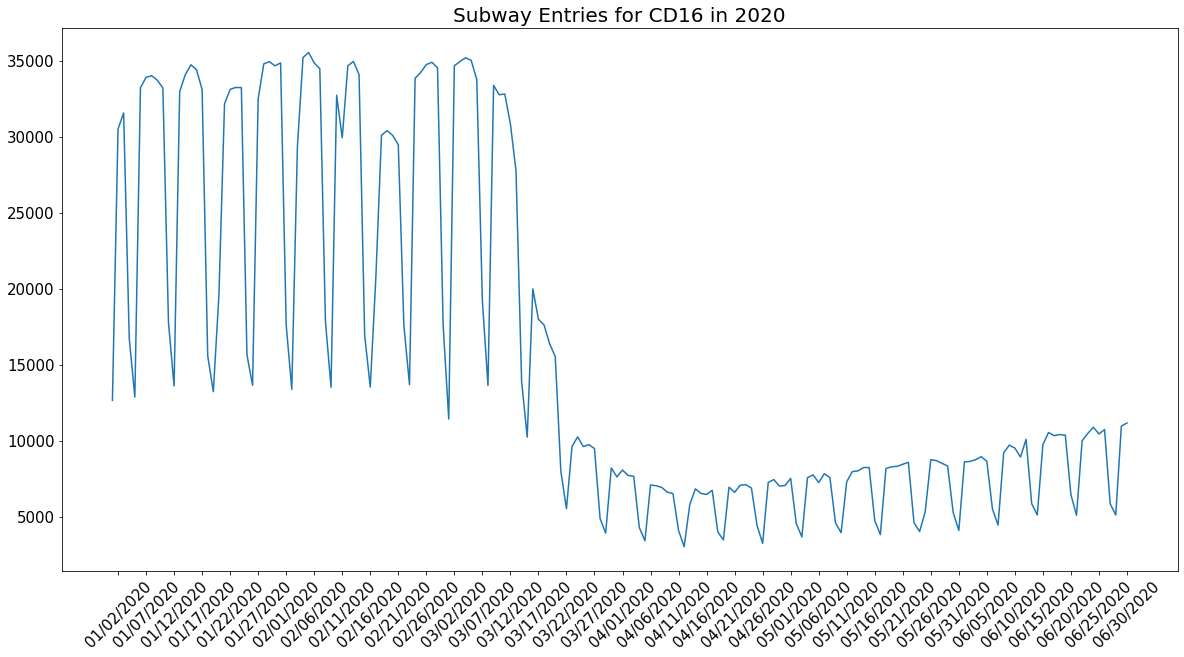

In [3]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_brownsville['dates'],df_brownsville['brownsville_entries'])
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for CD16 in 2020', size=20)

In [4]:
CD6 = pd.read_csv('Turnstile_Usage_Data__2020_CD6.csv')
CD6 = CD6[CD6['Date'].str.contains('2020')]

dates = CD6.Date.unique()
stations = CD6.Station.unique()
stations = stations.tolist()

CD6 = CD6.rename(columns={"Exits                                                     ": "Exits"})
CD6['Entries'] = CD6['Entries'].astype(float)
CD6['Exits'] = CD6['Exits'].astype(float)

CD6['Entries'][(CD6['Date'] == '03/15/2020') & (CD6['Station'] == 'CARROLL ST')] = 0
CD6['Exits'][(CD6['Date'] == '03/15/2020') & (CD6['Station'] == 'CARROLL ST')] = 0

sum_list = []
exit_list = []
turnstiles_list = []

for i in range(len(dates)):
    for s in range(len(stations)):
        turnstiles = CD6['SCP'][CD6['Station']==stations[s]].unique()
        turnstiles_list.append(len(turnstiles))
        sum_turnstiles = sum(turnstiles_list)
        for j in range(len(turnstiles)):
            sum_list.append(CD6['Entries'][(CD6['Date']==dates[i]) & (CD6['Station']==stations[s]) & (CD6['SCP']==turnstiles[j])].max() - CD6['Entries'][(CD6['Date']==dates[i]) & (CD6['Station']==stations[s]) & (CD6['SCP']==turnstiles[j])].min())
            exit_list.append(CD6['Exits'][(CD6['Date']==dates[i]) & (CD6['Station']==stations[s]) & (CD6['SCP']==turnstiles[j])].max() - CD6['Exits'][(CD6['Date']==dates[i]) & (CD6['Station']==stations[s]) & (CD6['SCP']==turnstiles[j])].min())
            
sum_list = pd.Series(sum_list).fillna(0).tolist()
exit_list = pd.Series(exit_list).fillna(0).tolist()

len_turnstiles = int(sum_turnstiles/len(dates))
temp = [sum(sum_list[i:i+len_turnstiles]) for i in range(0, len(sum_list), len_turnstiles)]
exit_temp = [sum(exit_list[i:i+len_turnstiles]) for i in range(0, len(exit_list), len_turnstiles)]

df_CD6 = pd.DataFrame([dates,temp, exit_temp], index=['dates','CD6_entries','CD6_exits'])
df_CD6 = df_CD6.transpose()
df_CD6 = df_CD6.sort_values(by=['dates'])

c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Text(0.5, 1.0, 'Subway Entries for CD6 in 2020')

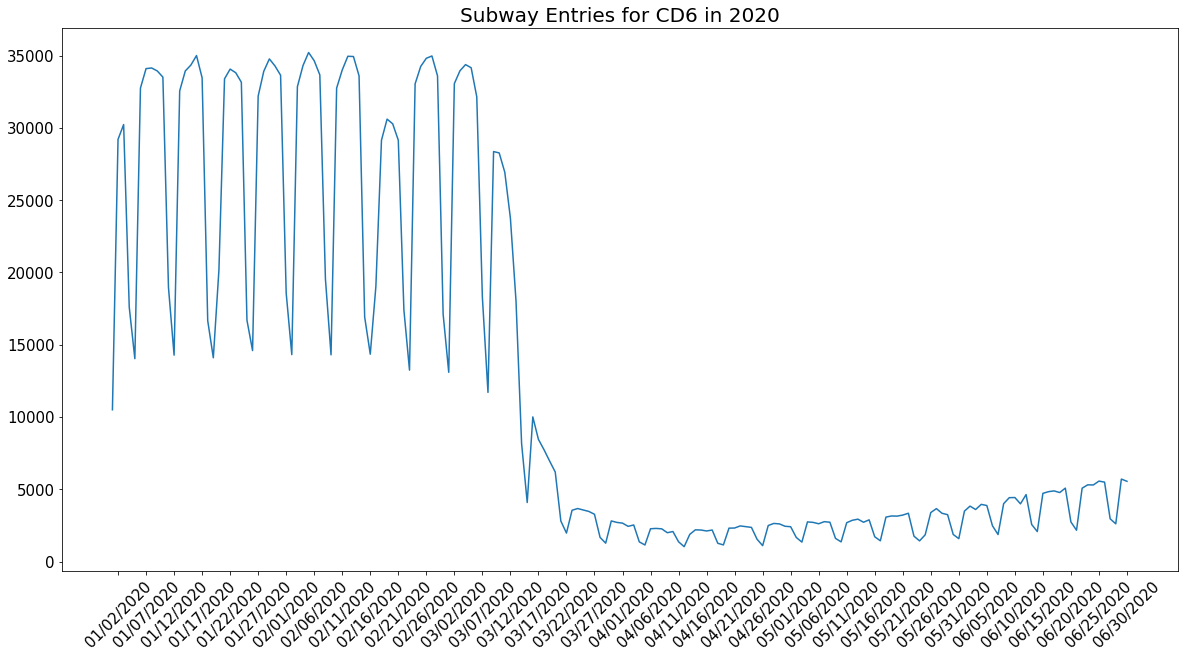

In [5]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_CD6['dates'],df_CD6['CD6_entries'])
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for CD6 in 2020', size=20)

In [10]:
CD12 = pd.read_csv('Turnstile_Usage_Data__2020_CD12.csv')
CD12 = CD12[CD12['Date'].str.contains('2020')]

dates = CD12.Date.unique()
stations = CD12.Station.unique()
stations = stations.tolist()

CD12 = CD12.rename(columns={"Exits                                                     ": "Exits"})
CD12['Entries'] = CD12['Entries'].astype(float)
CD12['Exits'] = CD12['Exits'].astype(float)

CD12['Entries'][(CD12['Date'] == '06/17/2020') & (CD12['Station'] == 'DITMAS AV')] = 0
CD12['Exits'][(CD12['Date'] == '06/17/2020') & (CD12['Station'] == 'DITMAS AV')] = 0

sum_list = []
exit_list = []
turnstiles_list = []

for i in range(len(dates)):
    for s in range(len(stations)):
        turnstiles = CD12['SCP'][CD12['Station']==stations[s]].unique()
        turnstiles_list.append(len(turnstiles))
        sum_turnstiles = sum(turnstiles_list)
        for j in range(len(turnstiles)):
            sum_list.append(CD12['Entries'][(CD12['Date']==dates[i]) & (CD12['Station']==stations[s]) & (CD12['SCP']==turnstiles[j])].max() - CD12['Entries'][(CD12['Date']==dates[i]) & (CD12['Station']==stations[s]) & (CD12['SCP']==turnstiles[j])].min())
            exit_list.append(CD12['Exits'][(CD12['Date']==dates[i]) & (CD12['Station']==stations[s]) & (CD12['SCP']==turnstiles[j])].max() - CD12['Exits'][(CD12['Date']==dates[i]) & (CD12['Station']==stations[s]) & (CD12['SCP']==turnstiles[j])].min())
            
sum_list = pd.Series(sum_list).fillna(0).tolist()
exit_list = pd.Series(exit_list).fillna(0).tolist()

len_turnstiles = int(sum_turnstiles/len(dates))
temp = [sum(sum_list[i:i+len_turnstiles]) for i in range(0, len(sum_list), len_turnstiles)]
exit_temp = [sum(exit_list[i:i+len_turnstiles]) for i in range(0, len(exit_list), len_turnstiles)]

df_CD12 = pd.DataFrame([dates,temp, exit_temp], index=['dates','CD12_entries','CD12_exits'])
df_CD12 = df_CD12.transpose()
df_CD12 = df_CD12.sort_values(by=['dates'])

c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Text(0.5, 1.0, 'Subway Entries for CD12 in 2020')

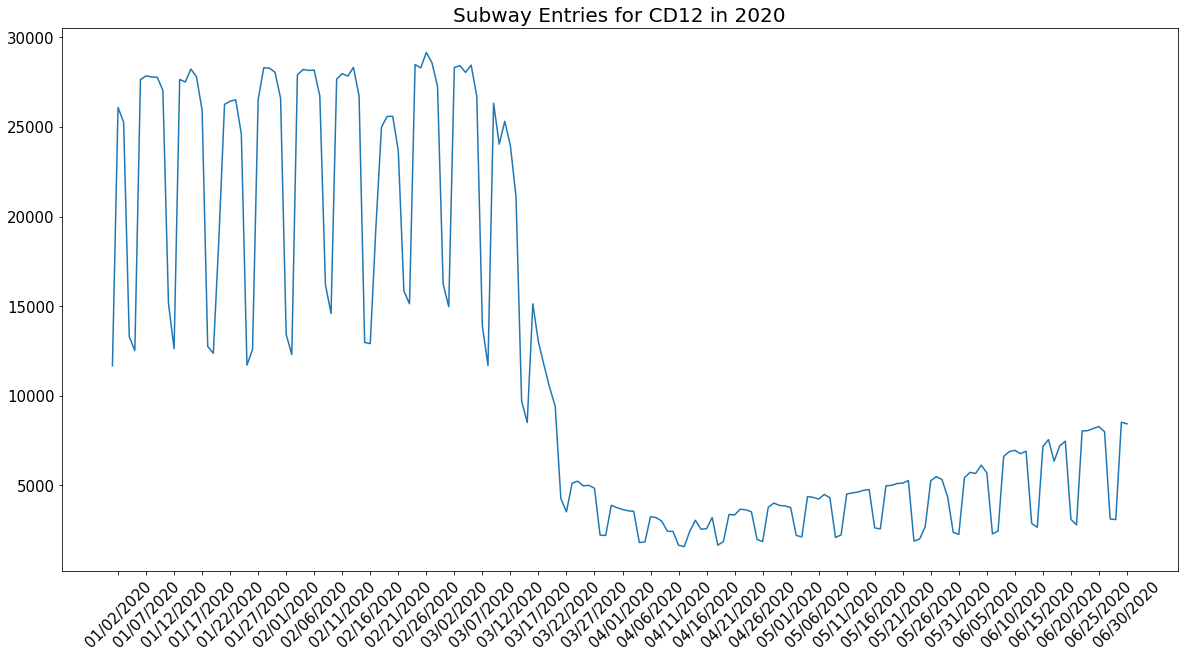

In [11]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_CD12['dates'],df_CD12['CD12_entries'])
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for CD12 in 2020', size=20)

In [21]:
CD17 = pd.read_csv('Turnstile_Usage_Data__2020_CD17.csv')
CD17 = CD17[CD17['Date'].str.contains('2020')]

dates = CD17.Date.unique()
stations = CD17.Station.unique()
stations = stations.tolist()

CD17 = CD17.rename(columns={"Exits                                                     ": "Exits"})
CD17['Entries'] = CD17['Entries'].astype(float)
CD17['Exits'] = CD17['Exits'].astype(float)

# CD17['Entries'][(CD17['Date'] == '06/17/2020') & (CD17['Station'] == 'DITMAS AV')] = 0
# CD17['Exits'][(CD17['Date'] == '06/17/2020') & (CD17['Station'] == 'DITMAS AV')] = 0

sum_list = []
exit_list = []
turnstiles_list = []

for i in range(len(dates)):
    for s in range(len(stations)):
        turnstiles = CD17['SCP'][CD17['Station']==stations[s]].unique()
        turnstiles_list.append(len(turnstiles))
        sum_turnstiles = sum(turnstiles_list)
        for j in range(len(turnstiles)):
            sum_list.append(CD17['Entries'][(CD17['Date']==dates[i]) & (CD17['Station']==stations[s]) & (CD17['SCP']==turnstiles[j])].max() - CD17['Entries'][(CD17['Date']==dates[i]) & (CD17['Station']==stations[s]) & (CD17['SCP']==turnstiles[j])].min())
            exit_list.append(CD17['Exits'][(CD17['Date']==dates[i]) & (CD17['Station']==stations[s]) & (CD17['SCP']==turnstiles[j])].max() - CD17['Exits'][(CD17['Date']==dates[i]) & (CD17['Station']==stations[s]) & (CD17['SCP']==turnstiles[j])].min())
            
sum_list = pd.Series(sum_list).fillna(0).tolist()
exit_list = pd.Series(exit_list).fillna(0).tolist()

len_turnstiles = int(sum_turnstiles/len(dates))
temp = [sum(sum_list[i:i+len_turnstiles]) for i in range(0, len(sum_list), len_turnstiles)]
exit_temp = [sum(exit_list[i:i+len_turnstiles]) for i in range(0, len(exit_list), len_turnstiles)]

df_CD17 = pd.DataFrame([dates,temp, exit_temp], index=['dates','CD17_entries','CD17_exits'])
df_CD17 = df_CD17.transpose()
df_CD17 = df_CD17.sort_values(by=['dates'])

In [76]:
df_CD17.to_csv('CD17_2020.csv')

Text(0.5, 1.0, 'Subway Entries for CD17 in 2020')

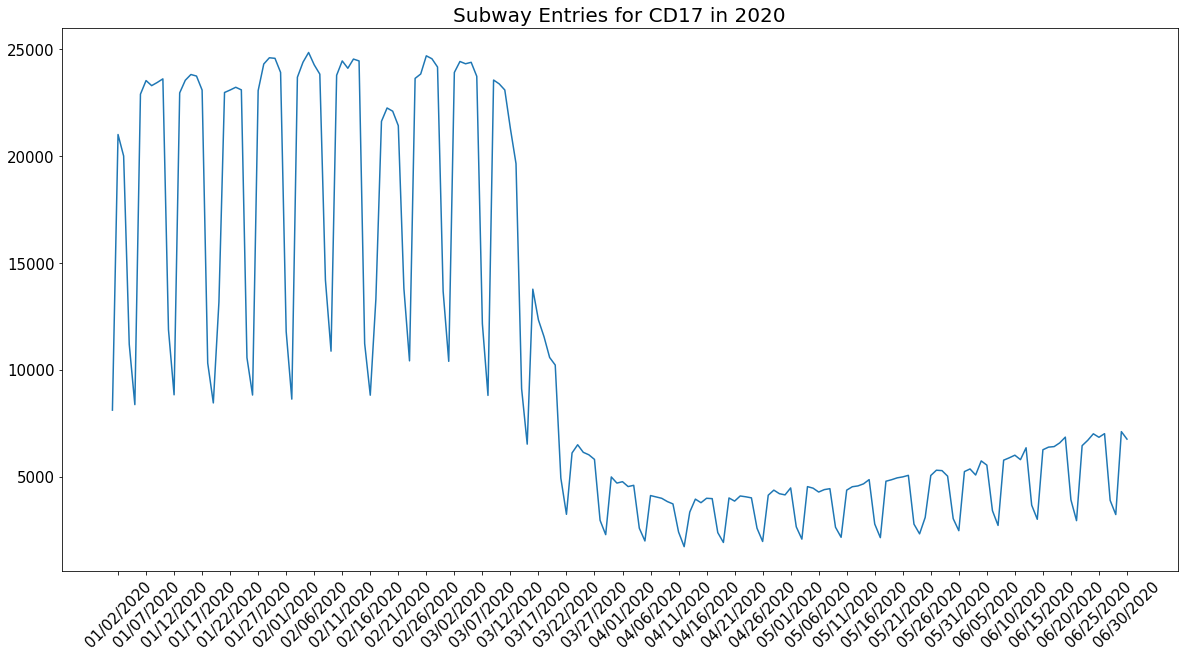

In [23]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_CD17['dates'],df_CD17['CD17_entries'])
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for CD17 in 2020', size=20)

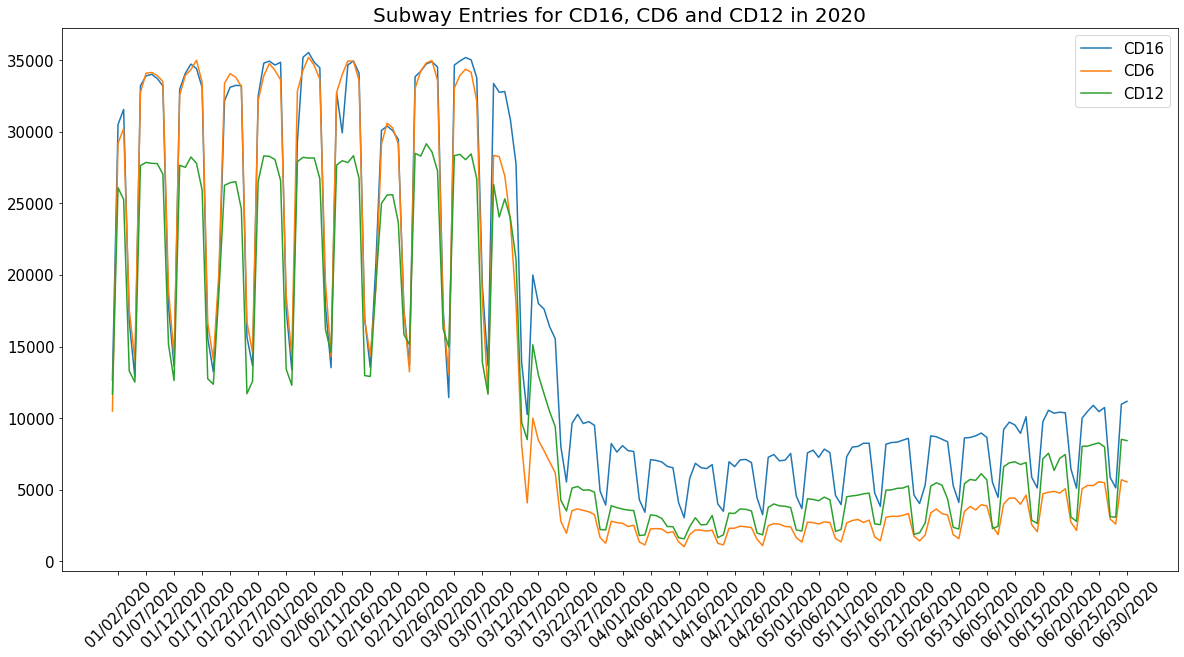

In [12]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_brownsville['dates'],df_brownsville['brownsville_entries'])
# plt.plot(df_CD5['dates'],df_CD5['CD5_entries'])
plt.plot(df_CD6['dates'],df_CD6['CD6_entries'])
plt.plot(df_CD12['dates'],df_CD12['CD12_entries'])
# plt.plot(df_CD17['dates'],df_CD17['CD17_entries'])


plt.legend(['CD16','CD6','CD12'], fontsize=15)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for CD16, CD6 and CD12 in 2020', size=20)

plt.show()

In [78]:
brownsville19 = pd.read_csv('Turnstile_Usage_Data__2019_CD16.csv')
brownsville19 = brownsville19[brownsville19['Date'].str.contains('2019')]

dates = brownsville19.Date.unique()
stations = brownsville19.Station.unique()
stations = stations.tolist()

brownsville19 = brownsville19.rename(columns={"Exits                                                     ": "Exits"})
brownsville19['Entries'] = brownsville19['Entries'].astype(float)
brownsville19['Exits'] = brownsville19['Exits'].astype(float)

brownsville19['Entries'][(brownsville19['Date'] == '05/11/2019') & (brownsville19['Station']== 'ROCKAWAY AV')] = 0
brownsville19['Exits'][(brownsville19['Date'] == '05/11/2019') & (brownsville19['Station']== 'ROCKAWAY AV')] = 0

sum_list = []
exit_list = []
turnstiles_list = []

for i in range(len(dates)):
    for s in range(len(stations)):
        turnstiles = brownsville19['SCP'][brownsville19['Station']==stations[s]].unique()
        turnstiles_list.append(len(turnstiles))
        sum_turnstiles = sum(turnstiles_list)
        for j in range(len(turnstiles)):
            sum_list.append(brownsville19['Entries'][(brownsville19['Date']==dates[i]) & (brownsville19['Station']==stations[s]) & (brownsville19['SCP']==turnstiles[j])].max() - brownsville19['Entries'][(brownsville19['Date']==dates[i]) & (brownsville19['Station']==stations[s]) & (brownsville19['SCP']==turnstiles[j])].min())
            exit_list.append(brownsville19['Exits'][(brownsville19['Date']==dates[i]) & (brownsville19['Station']==stations[s]) & (brownsville19['SCP']==turnstiles[j])].max() - brownsville19['Exits'][(brownsville19['Date']==dates[i]) & (brownsville19['Station']==stations[s]) & (brownsville19['SCP']==turnstiles[j])].min())

len_turnstiles = int(sum_turnstiles/len(dates))
temp = [sum(sum_list[i:i+len_turnstiles]) for i in range(0, len(sum_list), len_turnstiles)]
exit_temp = [sum(exit_list[i:i+len_turnstiles]) for i in range(0, len(exit_list), len_turnstiles)]

df_brownsville19 = pd.DataFrame([dates,temp, exit_temp], index=['dates','brownsville_entries','brownsville_exits'])
df_brownsville19 = df_brownsville19.transpose()
df_brownsville19 = df_brownsville19.sort_values(by=['dates'])

c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [79]:
df_brownsville19.to_csv('CD16_2019.csv')

Text(0.5, 1.0, 'Subway Entries for CD16 in 2019')

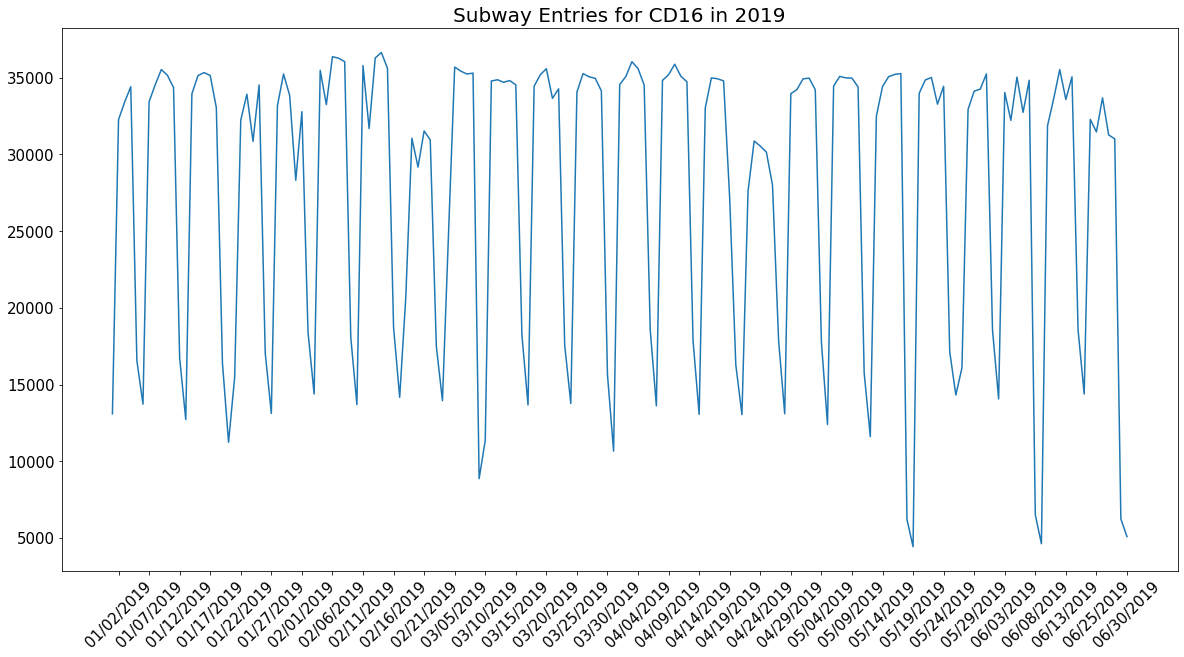

In [62]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_brownsville19['dates'],df_brownsville19['brownsville_entries'])
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for CD16 in 2019', size=20)

In [63]:
df_brownsville20 = df_brownsville[df_brownsville.dates != '02/29/2020']

In [64]:
df_brownsville20['dates'] = pd.to_datetime(df_brownsville20['dates'])
df_brownsville20['dates'] = df_brownsville20['dates'].dt.strftime('%m-%d')

c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_brownsville19['dates'] = pd.to_datetime(df_brownsville19['dates'])
df_brownsville19['dates'] = df_brownsville19['dates'].dt.strftime('%m-%d')

In [71]:
dates = df_brownsville20.dates.unique()

Text(0.5, 1.0, 'Subway Entries for Brownsville in 2019 and 2020')

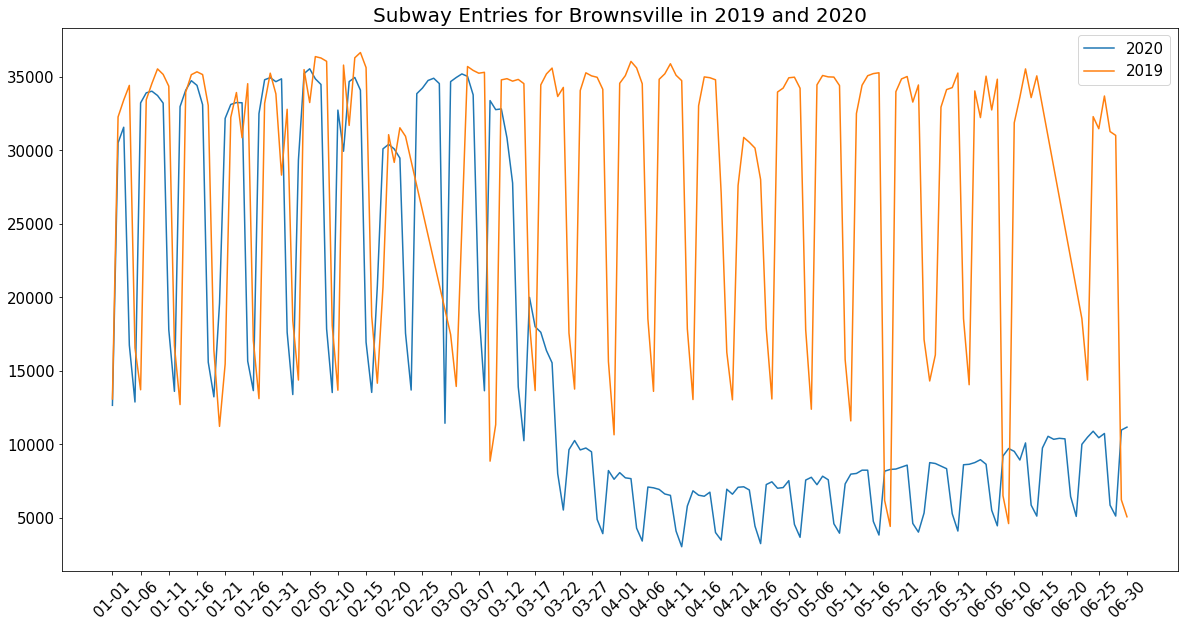

In [72]:
fig, axes = plt.subplots(figsize = (20,10))

plt.plot(df_brownsville20['dates'],df_brownsville20['brownsville_entries'])
plt.plot(df_brownsville19['dates'],df_brownsville19['brownsville_entries'])

plt.legend(['2020','2019'], fontsize=15)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.xticks(dates[::5])
plt.title('Subway Entries for Brownsville in 2019 and 2020', size=20)

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy

In [81]:
data = [df_brownsville['dates'], df_brownsville['brownsville_entries']]
header = ['dates', 'brownsville_entries']
df_brownsville_subway = pd.concat(data, axis=1, keys=header)
df_brownsville_subway['dates']= pd.to_datetime(df_brownsville_subway['dates'])
df_brownsville_subway['brownsville_entries'] = df_brownsville_subway['brownsville_entries'].astype(float)
df_brownsville_subway.head()

,dates,brownsville_entries
181,2020-01-01,12662.0
180,2020-01-02,30508.0
179,2020-01-03,31562.0
178,2020-01-04,16752.0
177,2020-01-05,12888.0


In [82]:
df_brownsville_subway.set_index('dates',inplace=True)
df_brownsville_subway.head()

,brownsville_entries
dates,
2020-01-01,12662.0
2020-01-02,30508.0
2020-01-03,31562.0
2020-01-04,16752.0
2020-01-05,12888.0


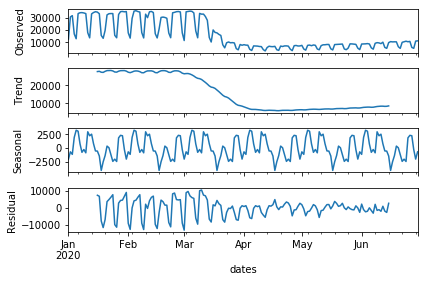

In [83]:
res = sm.tsa.seasonal_decompose(df_brownsville_subway,model='additive',freq=30) #try mult
res.plot()
plt.show()